# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить  модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель: определить регион, где добыча принесёт наибольшую прибыль**

1. [Загрузка и подготовка данных](#старт)
    - [вывод](#вывод1.1)
2. [Обучение и проверка модели](#обучение)
    - [вывод](#вывод2.1)
3. [Подготовка к расчёту прибыли](#модель)
    - [вывод](#вывод3.1)
4. [Расчёт прибыли и рисков](#расчет)
    - [вывод](#вывод4.1)
5. [Подсчет рисков и прибыли для каждого региона](#подсчет)
    - [вывод](#вывод5.1)
6. [Вывод](#вывод)  
7. [Чек-лист готовности проекта](#лист)

## Загрузка и подготовка данных
<a id="старт"></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore')# Игнорировать все предупреждения

import pandas as pd# импорт библиотеки pandas
import numpy as np #Импорт модуля numpy. numpy работает с однородными многомерными массивами (матрицами)

import matplotlib.pyplot as plt#Импорт модуля matplotlib
import seaborn as sns# импорт seaborn

from IPython.display import display

from sklearn.model_selection import train_test_split # функция  для разделения датасет на данные для обучения и тестирования
from sklearn.preprocessing import StandardScaler # импортируем StandardScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # импортируем LinearRegression из библиотеки sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_1=pd.read_csv('/datasets/geo_data_0.csv')# чтение файла с данными с сохранением в data_1
data_2=pd.read_csv('/datasets/geo_data_1.csv')# чтение файла с данными с сохранением в data_2
data_3=pd.read_csv('/datasets/geo_data_2.csv')# чтение файла с данными с сохранением в data_3

In [3]:
display(data_1.head(), data_2.head(),  data_3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
data_1.info()#выведем информацию по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [10]:
display(print('Суммарное количество дубликатов в регионе 1:', data_1.duplicated().sum(), 'шт'),
        print('Суммарное количество дубликатов в регионе 2:',data_2.duplicated().sum(), 'шт'), 
        print('Суммарное количество дубликатов в регионе 3:',data_3.duplicated().sum(), 'шт'))

Суммарное количество дубликатов в регионе 1: 0 шт
Суммарное количество дубликатов в регионе 2: 0 шт
Суммарное количество дубликатов в регионе 3: 0 шт


None

None

None

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


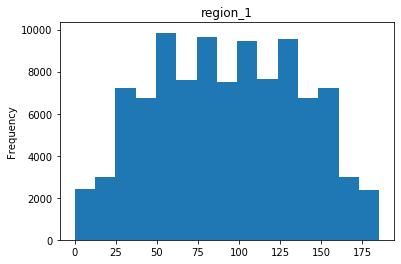

In [11]:
display(data_1.corr(), data_1['product'].plot(kind='hist', y='duration', bins=15, title = 'region_1'))

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


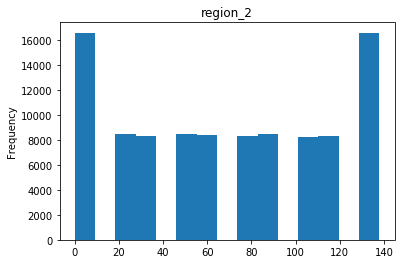

In [12]:
display(data_2.corr(), data_2['product'].plot(kind='hist', y='product', bins=15, title = 'region_2'))

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


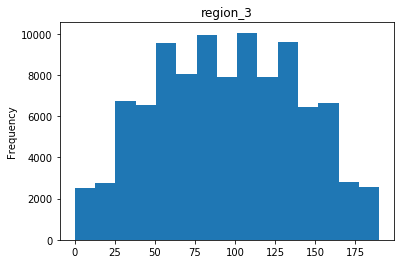

In [13]:
display(data_3.corr(), data_3['product'].plot(kind='hist', y='product', bins=15, title = 'region_3'))

### Вывод
<a id="вывод1.1"></a>

Для построения модели представлены наборы данных по трем регионам.
В каждой таблице по 5 столбцов и 100000 объектов:
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек;
* product — объём запасов в скважине (тыс. баррелей)

Пропущенных значений нет.
Дубликатов нет.
Названия столбцов - корректны.
Типы данных   4 колонки - float64 и одна - object.

Для дальнейшего анализа столбец ['id'] необходимо удалить. Информативной нагрузки не несет, для анализа не нужен.

Во всех трех регионах выявлены скажены, содержащие нуливые запасы нефти. Больше половины скажен по всем трем участкам умеют запасы нефти ниже 94 тыс.баррелей на скважину.

В колонках наблюдается небольшой разброс данных.
В данных региона 2 выявлена сильная корреляция между целевым признаком и признаком f2. Коэффициент корреляции близок к единице.
В регионах 1 и 3 коэффициент корреляции близок к 0,5 и это нужно иметь ввиду при построении модели.
Данные регионов один и три стремятся к нормальному распределению, регион два - распределение далеко от нормального.

## Обучение и проверка модели
<a id="обучение"></a>

Обучим и проверим модель для каждого региона:
* 1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
* 2. Обучим модель и сделаем предсказания на валидационной выборке.
* 3. Сохраним предсказания и правильные ответы на валидационной выборке.
* 4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
* 5. Проанализируем результаты.

Удаляем признак для региона 2, который сильно коррелирует с целевым признаком

Напишем функцию, которая получается данные, разбивает их на обучающую и валидационную выборки. После чего масштабируем данные и обучаем модель линейной регрессии. На обученной модели получаем предсказания и рассчитываем показатели работы модели.

In [14]:
def region_study(region):
    X =region.drop(['product', 'id'], axis=1)# признаки 
    y = region['product']# целевой признак
    features_train, features_valid, target_train, target_valid = train_test_split(X, y, 
                                                    train_size=0.75, random_state=42)
    
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
        
    model=LinearRegression() #инициализируйте модель LinearRegression()
    model.fit(features_train, target_train)# обучите модель на обучающей выборке

    predicted_valid = model.predict(features_valid)  # получаем предсказания модели на валидационной выборке

    mse=mean_squared_error(target_valid, predicted_valid)# средняя квадратичная ошибка
    RMSE = mse ** 0.5# квадратный корень из средней квадратичной ошибки
    mean = predicted_valid.mean()# среднее значение product
    study= ({'mse': mse, 'rmse':RMSE, 'mean':mean, 'target_valid': target_valid, 'predicted_valid':predicted_valid})
  

    return  dict(study)

In [15]:
region_1_all= region_study(data_1)
predicted_valid_1 =  pd.Series(region_1_all.pop('predicted_valid'))
target_valid_1 =  pd.Series(region_1_all.pop('target_valid'))
region_1=region_1_all

region_2_all= region_study(data_2)
predicted_valid_2 = pd.Series(region_2_all.pop('predicted_valid'))
target_valid_2 = pd.Series(region_2_all.pop('target_valid'))
region_2=region_2_all

region_3_all= region_study(data_3)
predicted_valid_3 = pd.Series(region_3_all.pop('predicted_valid'))
target_valid_3 = pd.Series(region_3_all.pop('target_valid'))
region_3=region_3_all

In [16]:
region_all = pd.DataFrame([region_1,region_2,region_3], index=['region_1','region_2','region_3'])
region_all

,mse,rmse,mean
region_1,1425.560870,37.756600,92.398800
region_2,0.792599,0.890280,68.712878
region_3,1611.691064,40.145872,94.771024


Предсказания среднего запаса нефти на валидационной выборке почти не отличаются от фактических запасов нефти в каждом из регионов.

Метрики MSE и RSME —  являются характеристиками модели, их показатели должны быть как можно меньше. Видим, что наименьший показатель данных метрик в первом регионе.

### Вывод
<a id="вывод2.1"></a>

В этом разделе проекта были разделены исходные данные на обучающую и валидационную выборки.
Обучена модель линейной регрессии и проанализировали метрики: MSE, RMSE и mean.
Рассчитанные моделью средние значения нефти очень близки к реальным данным.

In [17]:
pd.DataFrame({'mean_real':[92.5, 68.8, 95.0], 'mean_pred': [92.4, 68.8, 94.8]}, index=['region_1','region_2','region_3'])

,mean_real,mean_pred
region_1,92.5,92.4
region_2,68.8,68.8
region_3,95.0,94.8


Показатели модели метрики MSE и RSME указывают на низкое качество предсказаний. Наилучшие метрики у модели в первом и в третьем регионах. Самые плохие показания метрик во втором регионе.

## Подготовка к расчёту прибыли
<a id="расчет"></a>

3.1. Сохраним все ключевые значения для расчётов  в отдельных переменных.

In [18]:
MAX_POINTS = 500 # исследуют 500 точек
BEST_POINT = 200 # разработки 200 точек
BUDGET_PER_REGION = 10*10**9 # Бюджет на разработку месторождений — 10 млрд рублей
PRICE_PER_PRODUCT = 450000  # доход с одной единицы продукта (в рублях)
RISK = 0.025 # максимальный уровень убытков 

3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 
Сравните полученный объём сырья со средним запасом в каждом регионе.

In [19]:
size_well=BUDGET_PER_REGION/(PRICE_PER_PRODUCT*BEST_POINT)
print('Достаточный объём сырья для безубыточной разработки новой скважины:', size_well, 'тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111 тыс. баррелей


In [20]:
print ('объём сырья со средним запасом в регион 1:', (data_1['product'].mean()).round(1), 'тыс. баррелей')
print ('объём сырья со средним запасом в регион 2:', (data_2['product'].mean()).round(1), 'тыс. баррелей')
print ('объём сырья со средним запасом в регион 3:', (data_3['product'].mean()).round(1), 'тыс. баррелей')

объём сырья со средним запасом в регион 1: 92.5 тыс. баррелей
объём сырья со средним запасом в регион 2: 68.8 тыс. баррелей
объём сырья со средним запасом в регион 3: 95.0 тыс. баррелей


Подсчитаем сколько скважин в регионе соответствует этому требованию

In [21]:
print ('Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 1:', len(data_1.query('product>111'))/len(data_1)*100, '%')
print ('Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 2:', len(data_2.query('product>111'))/len(data_2)*100, '%')
print ('Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 3:', len(data_3.query('product>111'))/len(data_3)*100, '%')

Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 1: 36.675999999999995 %
Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 2: 16.537 %
Процент скважин с подходящим количеством нефти для безубыточной разработки в регион 3: 38.278 %


### Вывод
<a id="вывод3.1"></a>

Для безубыточной разработки новой скважины необходимо, чтобы ее запасы оценивались не менее 111 тыс. баррелей.

В рассматриваемых регионах средние запасы нефти не превышают 95 тыс. баррелей. 

Только 36, 38 и 16% скважин в первом, третьем и во втором регионах соответственно отвечают требованиям получения возможной прибыли.

## Расчёт прибыли и рисков 
<a id="расчет"></a>

Напишим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
* выберите скважины с максимальными значениями предсказаний.
* просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
* рассчитаем прибыль для полученного объёма сырья.

In [22]:
def profit(reg, target_valid, predicted_valid):
    sample=reg.sort_values(by="product",ascending=False)# отсортируем данные в порядке убывания
    total_profit=(sample['product'][0:BEST_POINT].sum()*PRICE_PER_PRODUCT-BUDGET_PER_REGION)/10**9#  подсчитаем прибыль на первых 200 скважинах богатых нефтью 
    
    sample_valid=target_valid.sort_values(ascending=False)# отсортируем данные в порядке убывания
    total_profit_valid=(sample_valid[0:BEST_POINT].sum()*PRICE_PER_PRODUCT-BUDGET_PER_REGION)/10**9#  подсчитаем прибыль на первых 200 скважинах богатых нефтью 
    
    sample_pred=predicted_valid.sort_values(ascending=False)# отсортируем данные в порядке убывания
    total_profit_pred = (sample_pred[0:BEST_POINT].sum()*PRICE_PER_PRODUCT-BUDGET_PER_REGION)/10**9#  подсчитаем прибыль на первых 200 скважинах богатых нефтью 
    
    profit_all = ({'total_profit':total_profit, 'total_profit_valid':total_profit_valid, 'total_profit_pred':total_profit_pred})
    return profit_all

In [23]:
reg_1=profit(data_1, target_valid_1, predicted_valid_1)
reg_2=profit(data_2, target_valid_2, predicted_valid_2)
reg_3=profit(data_3, target_valid_3, predicted_valid_3)
reg_prof = pd.DataFrame([reg_1,reg_2,reg_3], index=['region_1','region_2','region_3'])
reg_prof

,total_profit,total_profit_valid,total_profit_pred
region_1,6.635037,6.509319,3.896658
region_2,2.415087,2.415087,2.486938
region_3,7.059633,6.947125,3.377982


In [24]:
def prof(targ_valid, pred_valid):
    pred_valid_subs = pred_valid.sample(n=MAX_POINTS, replace=True, random_state=12345)
    pred_valid_subs = pred_valid_subs.sort_values(ascending=False)[:BEST_POINT]
    select =  targ_valid[pred_valid_subs.index]
    total_profit=(select.sum()*PRICE_PER_PRODUCT-BUDGET_PER_REGION)/10**9
    return total_profit

In [25]:
region_1=prof(data_1['product'], predicted_valid_1)
region_2=prof(data_2['product'], predicted_valid_2)
region_3=prof(data_3['product'], predicted_valid_3)
region_prof = pd.DataFrame({'profit':[region_1,region_2,region_3]}, index=['region_1','region_2','region_3'])
region_prof

,profit
region_1,-1.641132
region_2,-3.453592
region_3,-1.562084


### Вывод
<a id="вывод4.1"></a>

Доход на скважинах, в количестве 200 шт,  наиболее богатыми нефтянными запасами, не превышает 7 млрд. руб. в третьем регионе по предоставленным данным. В тоже время по предсказаниям модели доход ожидается в два раза меньше. Такая же картина наблюдается и в первом регионе. Модель предсказывает доход в два раза меньше номинального. Во втором регионе ожидаются  убытки в размере 3,5 млрд. руб. по предсказаниям модели.

## Подсчет рисков и прибыли для каждого региона
<a id="подсчет"></a>

* применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.
* напишем выводы: предложите регион для разработки скважин и обоснуйте выбор.

# **Тест**

# **Исходные материалы**

In [26]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)# отсортируем данные в порядке убывания
    selected = target[probs_sorted.index][:count]  # первые 200 объектов 
    return ((PRICE_PER_PRODUCT*selected.sum() - BUDGET_PER_REGION)/10**9)#  подсчитаем прибыль на первых 200 скважинах богатых нефтью 
                                                                                                                                           # и вычтем бюджет на разработку скважин 

def part(targ,pred):  
    state = np.random.RandomState(12345)
    values = []
  
    for i in range(1000): # техника Bootstrap с 1000 выбороками
        target_subsample = targ.sample(n=MAX_POINTS, replace=True, random_state=state)
        probs_subsample = pred[target_subsample.index]      
        values.append(revenue(target_subsample, probs_subsample,  BEST_POINT))
    
 

    values = pd.Series(values)
    lower = values.quantile(0.025)# подсчитаем нижнюю границу 95%-й доверительного интервала
    upper = values.quantile(0.975)# подсчитаем верхнюю границу 95%-й доверительного интервала
    
    point=0
    for i in values:
        if i < 0:# получение убытка
            point +=1   
    risk_of_loss = point/values.count()*100


    mean = values.mean()
    loss = mean - (BUDGET_PER_REGION/10**9)
    print("Средняя выручка:", mean.round(1), 'млрд рублей')
    print('95% доверительный интервал от {:.2f} до {:.2f} млрд.руб.'.format(lower, upper))
    print("Риск получения убытков:", risk_of_loss, "%")

In [27]:
part(target_valid_1, predicted_valid_1)

Средняя выручка: -1.7 млрд рублей
95% доверительный интервал от -2.25 до -1.13 млрд.руб.
Риск получения убытков: 100.0 %


In [28]:
part(target_valid_2, predicted_valid_2)  

Средняя выручка: -3.8 млрд рублей
95% доверительный интервал от -4.44 до -3.22 млрд.руб.
Риск получения убытков: 100.0 %


In [29]:
part(target_valid_3, predicted_valid_3) 

Средняя выручка: -1.4 млрд рублей
95% доверительный интервал от -2.02 до -0.86 млрд.руб.
Риск получения убытков: 100.0 %


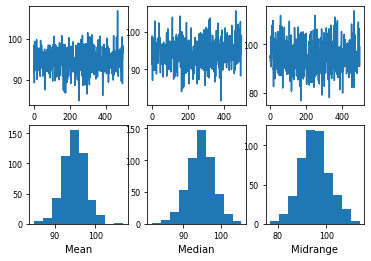

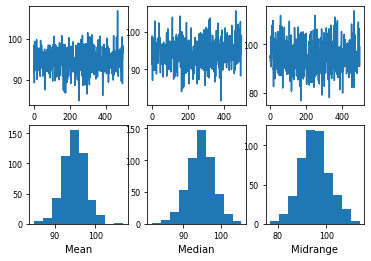

In [30]:
pd.plotting.bootstrap_plot(predicted_valid_3)

### Вывод
<a id="вывод5.1"></a>

Использование техники Bootstrap с 1000 выборок показало, что средняя выручка по регионам не превысит 8,6 млрд.руб.
Убытки могут достичь отметки 3,8 млрд.руб по второму региону, и 1,7 и 1,4 млрд. руб в первом и третьем соответственно.
Ни одни регион не соответствует требованию - вероятность убытков меньше 2.5%. Во всех трех регионах убытки превосходят этот уровень.

## Общий вывод

В ходе работы были рассмотрены  геологоразведочные данные трех регионов.
* Показано, что только 1/3  в первом и в третьем регионах и 1/6 часть скважин во втором регионе соответствуют требованию безубыточной добычи нефти.
* Минимальный объем нефти залегающий в скважине должен быть не менее 111 тыс. баррелей.
* Средний объем нефти по всем трем регионам меньше требуемого минимального значения объема нефти для безубыточной добычи.
* Модель линейной регрессии предсказала средний объем нефти по регионам с ошибкой в пределах 0,002%. Однако метрики модели MSE и RSME велики.
* Прибыль полученная на самых лучших скважинах, примерна равняется прибыли полученной на валидационной выборке, но не соответствует предсказанным.


| регион    | средний объем нефти, тыс. руб  |  прибыль мах, млрд. руб.  |    прибыль прогноз, млрд. руб.  | прибыль Bootstrap, млрд. руб.  |    
|:------------------:|:----------------------------------:|: ------------------------------:|: ------------------------------:|: ------------------------------:|
| регион 1           |  92.5 | 6.63 |3.89   |- 1.7 |
| регион 2 |  68.8    |  	2.41  |-3.52   |- 3.8|
| регион 3  |  95.0 |  7.05  | 3.37   |- 1.4 |

* Техникой Bootstrap были определены распределения прибыли по регионам. 

Наилучшим регионом является третий регион, в котором убыток самый минимальный -1,4 млрд. руб., ожидаемая средняя выручка - 8,6 млрд. руб., Максимальная прибыль на 200 самых богатых залежами нефти скважинах составит 7,05 млрд. руб.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован